
# What is data Analysis
Wikipedia:

Data analysis is a process of inspecting, cleansing, transforming, and modelling data with the goal of discovering useful information, informing conclusions, and supporting decision-making.

OR

The techniques to analyze data to enhance productivity and business gains. 

1) Gather hidden insights, 2) Generate Reports, 3) Perform market analysis, 4) Improve business requirements.

Data Cleaning: 
The process of detecting and correcting of corrupt or inaccurate records from a database (missing, outliers etc)

Data Manipulation: 
The process of changing data to make it more organized and easy to read. 

data imputation:

Most machine learning algorithms require numeric input values, and a value to be present for each row and column in a dataset. ... As such, it is common to identify missing values in a dataset and replace them with a numeric value. This is called data imputing, or missing data imputation

Problems of Missing data:

The missing values problem is usually common in all domains that deal with data and causes different issues like performance degradation, data analysis problems and biased outcomes lead by the differences in missing and complete values

Missing values can be handled by certain techniques including, deletion of instances and replacement with potential or estimated values, a technique denoted as imputation. Several traditional statistical and machine learning imputation techniques such as mean, regression, K nearest neighbor, ensemble based etc, have been proposed in the literature to handle missing values. 
(A survey on missing data in machine learning: https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00516-9).

# What is Exploratory Data Analysis?
Data exploration techniques is to understand the various aspects of data.
Steps: 1) Understand the data, 2) Clean the data, 3) Analysis between variables.



# Exploratory Data Analysis with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.


We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [65]:
train = pd.read_csv('titanic_train.csv')
#train = pd.read_csv(r'D:\Data Science Books\Lectures\Exploratory data analysis lecture\titanic_train.csv')

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [7]:
#train.notnull()
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

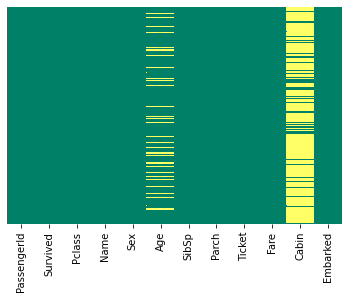

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='summer')

<AxesSubplot:>

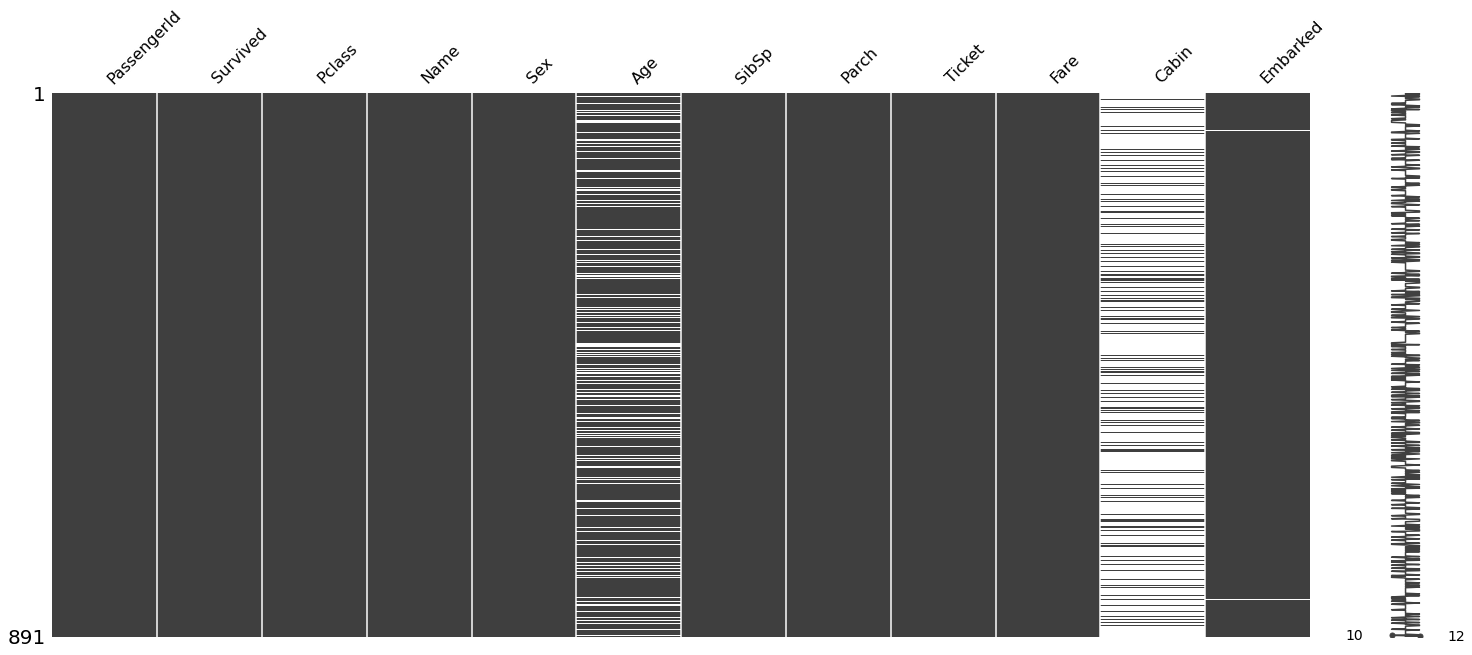

In [12]:
import missingno as msno
msno.matrix(train)

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"


<AxesSubplot:xlabel='Survived', ylabel='count'>

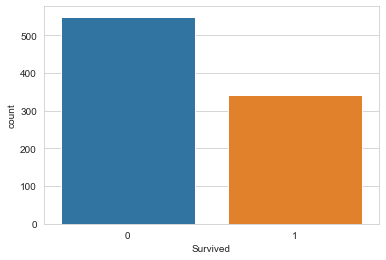

In [13]:
#Countplot: Show the counts of observations in each categorical bin using bars.
#survived 0 means the persond didn't survived, 1 means the person survived. 
#hue='Sex'
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

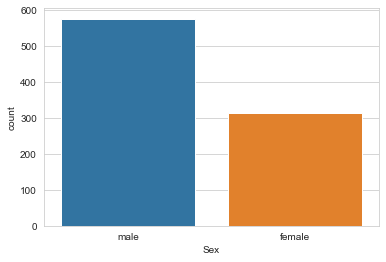

In [14]:
sns.countplot('Sex',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

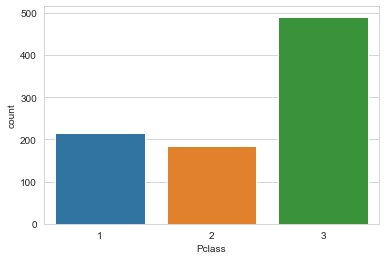

In [15]:
#Pclass: Passenger Class
sns.countplot('Pclass',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

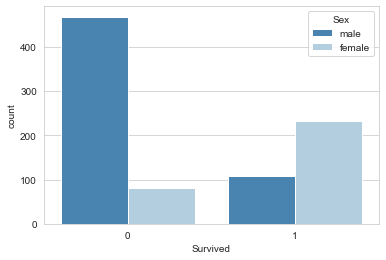

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='Blues_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

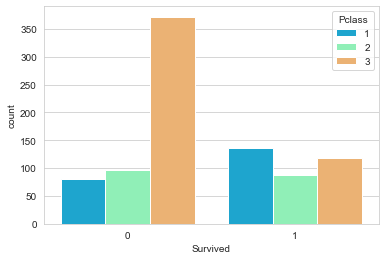

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [20]:
def number_children(passenger):
    Age, Sex= passenger
    if Age < 16:
        return 'child'
    else:
        return Sex
train['person'] = train[['Age','Sex']].apply(number_children, axis=1)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

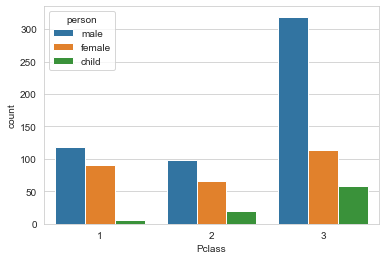

In [21]:
sns.countplot('Pclass', data=train, hue='person')

<AxesSubplot:>

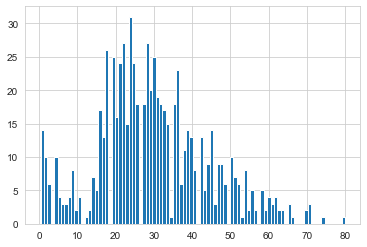

In [22]:
train['Age'].hist(bins=90)

In [23]:
#Comparison of male, female, and children
train['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

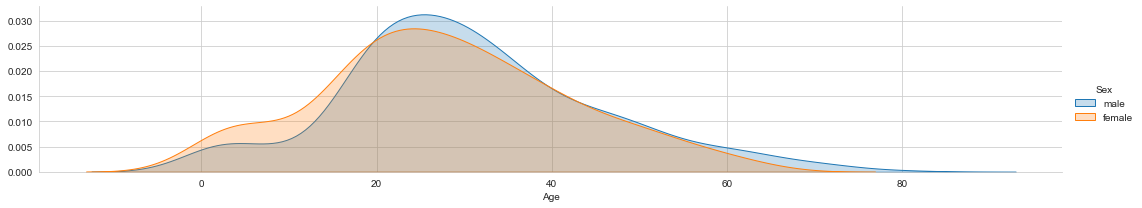

In [28]:
fig = sns.FacetGrid(train, hue="Sex",aspect=5)
fig.map(sns.kdeplot,'Age',shade= True)
fig.add_legend()

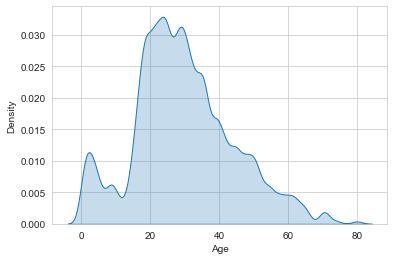

In [31]:
#bandwidth effect can be seen here with increasing or decreasing the values
sns.kdeplot(train['Age'], shade=True, bw=0.1) 
plt.show()

<AxesSubplot:xlabel='Age'>

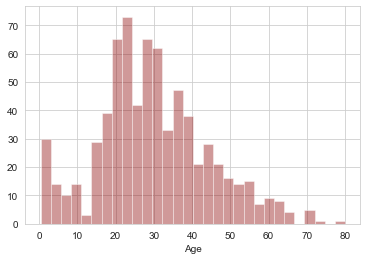

In [34]:
sns.distplot(train['Age'].dropna(), kde=False,color='darkred', bins=30)

<AxesSubplot:>

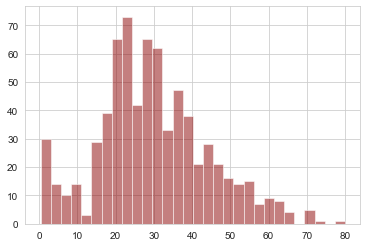

In [35]:
train['Age'].hist(bins=30,color='darkred',alpha=0.5)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

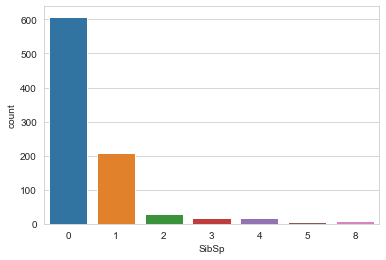

In [36]:
#determining the number of siblings and spouse. 0 means no siblings, 1 mean one family member, etc
sns.countplot(x='SibSp',data=train)

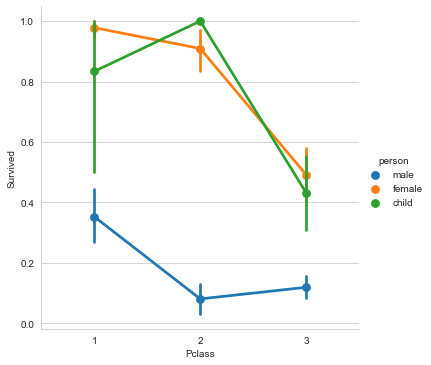

In [37]:
sns.catplot('Pclass','Survived',hue='person',data=train, kind='point', aspect=1)

<AxesSubplot:>

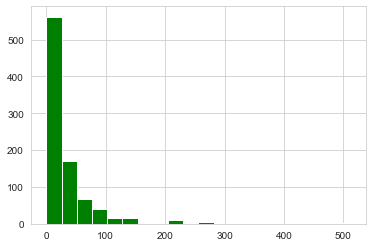

In [38]:
#determining the average fare; Matloptlib hist command
train['Fare'].hist(color='green',bins=20)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

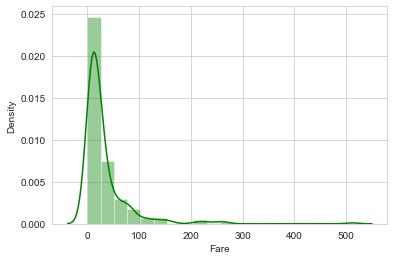

In [39]:
#seaborn displot or distplot command
sns.distplot(train['Fare'],color='green',bins=20)

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

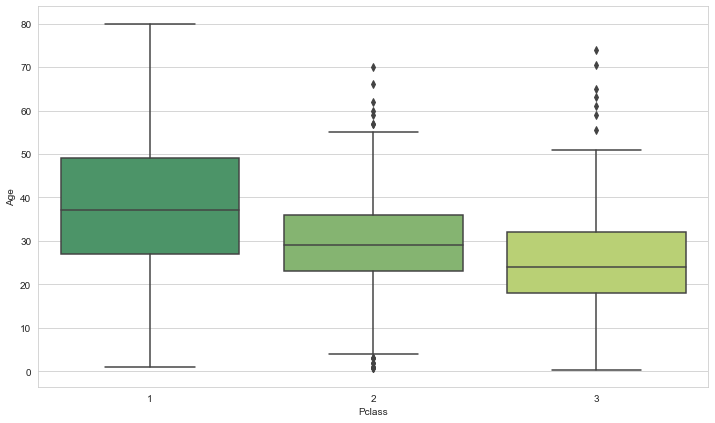

In [40]:
#Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. 
#Boxplot is also used to detect the outlier in data set.
#box plot is consisting of :Minimum, First Quartile or 25%, Median (Second Quartile) or 50%, Third Quartile or 75%, Maximum

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='summer')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [41]:
train['Age'].mean()

29.69911764705882

In [42]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [43]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [44]:
#Simply take replace the missing age with the mean age
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [45]:
train['Age'].mean()

29.06640852974186

Now let's check that heat map again!

<AxesSubplot:>

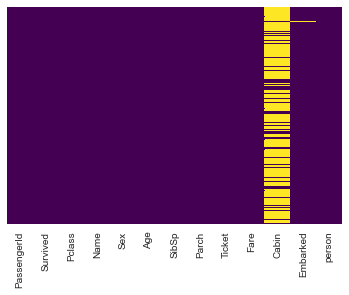

In [46]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [57]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
train['Embarked'].mode()

In [ ]:
#Filling the null values in the embarked columns as there are more passengers from Southamption. 
train['Embarked']=train['Embarked'].fillna('S')

In [ ]:
train.info()

In [ ]:
plt.figure(figsize = (15,10))
corr=train.corr()
sns.heatmap(corr, square=True, annot=True, vmax=.8, linewidths=0.02)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.
https://www.geeksforgeeks.org/how-to-create-dummy-variables-in-python-with-pandas/ 

In [ ]:
#displaying categorical values in Embarked column
train['Embarked'].unique()

In [49]:
# Dummy variable trapWhat is dummy variable trap example?
# The Dummy Variable trap is a scenario in which two or more variables are highly correlated; 
# in simple terms one variable can be predicted from the others

pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [50]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [51]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,person
0,1,0,3,22.0,1,0,7.2500,NaN,male
1,2,1,1,38.0,1,0,71.2833,C85,female
2,3,1,3,26.0,0,0,7.9250,NaN,female
3,4,1,1,35.0,1,0,53.1000,C123,female
4,5,0,3,35.0,0,0,8.0500,NaN,male


In [53]:
train = pd.concat([train,sex,embark],axis=1)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,person,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,male,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,female,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,female,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,female,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,male,1,0,1


In [55]:
#dropping the person column
train.drop('person',axis=1,inplace=True)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
